<div style="background-color: #3498db; color: white; text-align: center; padding: 1px; box-shadow: 0px 10px 10px rgba(0, 0, 0, 0.4);">
    <h1 style="font-weight: 900; font-size: 36px;"><i>IMPORTS</i></h1>
</div>

In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [2]:
df = load_dataset('hamza08456098/BreastCancer')['train']
df = pd.DataFrame(df)
df.head()

Generating train split:   0%|          | 0/569 [00:00<?, ? examples/s]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<div style="background-color: #3498db; color: white; text-align: center; padding: 1px; box-shadow: 0px 10px 10px rgba(0, 0, 0, 0.4);">
    <h1 style="font-weight: 900; font-size: 36px;"><i>EXPLORATORY DATA ANALYSIS (EDA)</i></h1>
</div>

In [3]:
custom_pallete = sns.color_palette("YlGnBu", as_cmap = True)
df.describe().T.style.background_gradient(cmap = custom_pallete)

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

#### M -> Malignant
#### B -> Benign

In [7]:
px.histogram(data_frame = df, x = 'diagnosis', color = 'diagnosis')

The bar corresponding to "B" (benign) is taller than the bar for "M" (malignant).

    Count for B (Benign): 357 occurrences.
    Count for M (Malignant): 212 occurrences.

In [8]:
px.histogram(data_frame = df, x = 'radius_mean', color = 'diagnosis')

In [9]:
px.histogram(data_frame = df, x = 'texture_mean', color = 'diagnosis')

In [10]:
px.histogram(data_frame = df, x = 'area_mean', color = 'diagnosis')

In [11]:
px.histogram(data_frame = df, x = 'compactness_mean', color = 'diagnosis')

In [12]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [13]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [14]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

<div style="background-color: #3498db; color: white; text-align: center; padding: 1px; box-shadow: 0px 10px 10px rgba(0, 0, 0, 0.4);">
    <h1 style="font-weight: 900; font-size: 36px;"><i>Data Preprocessing</i></h1>
</div>

In [15]:
df.drop('id', axis = 1, inplace = True)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [16]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


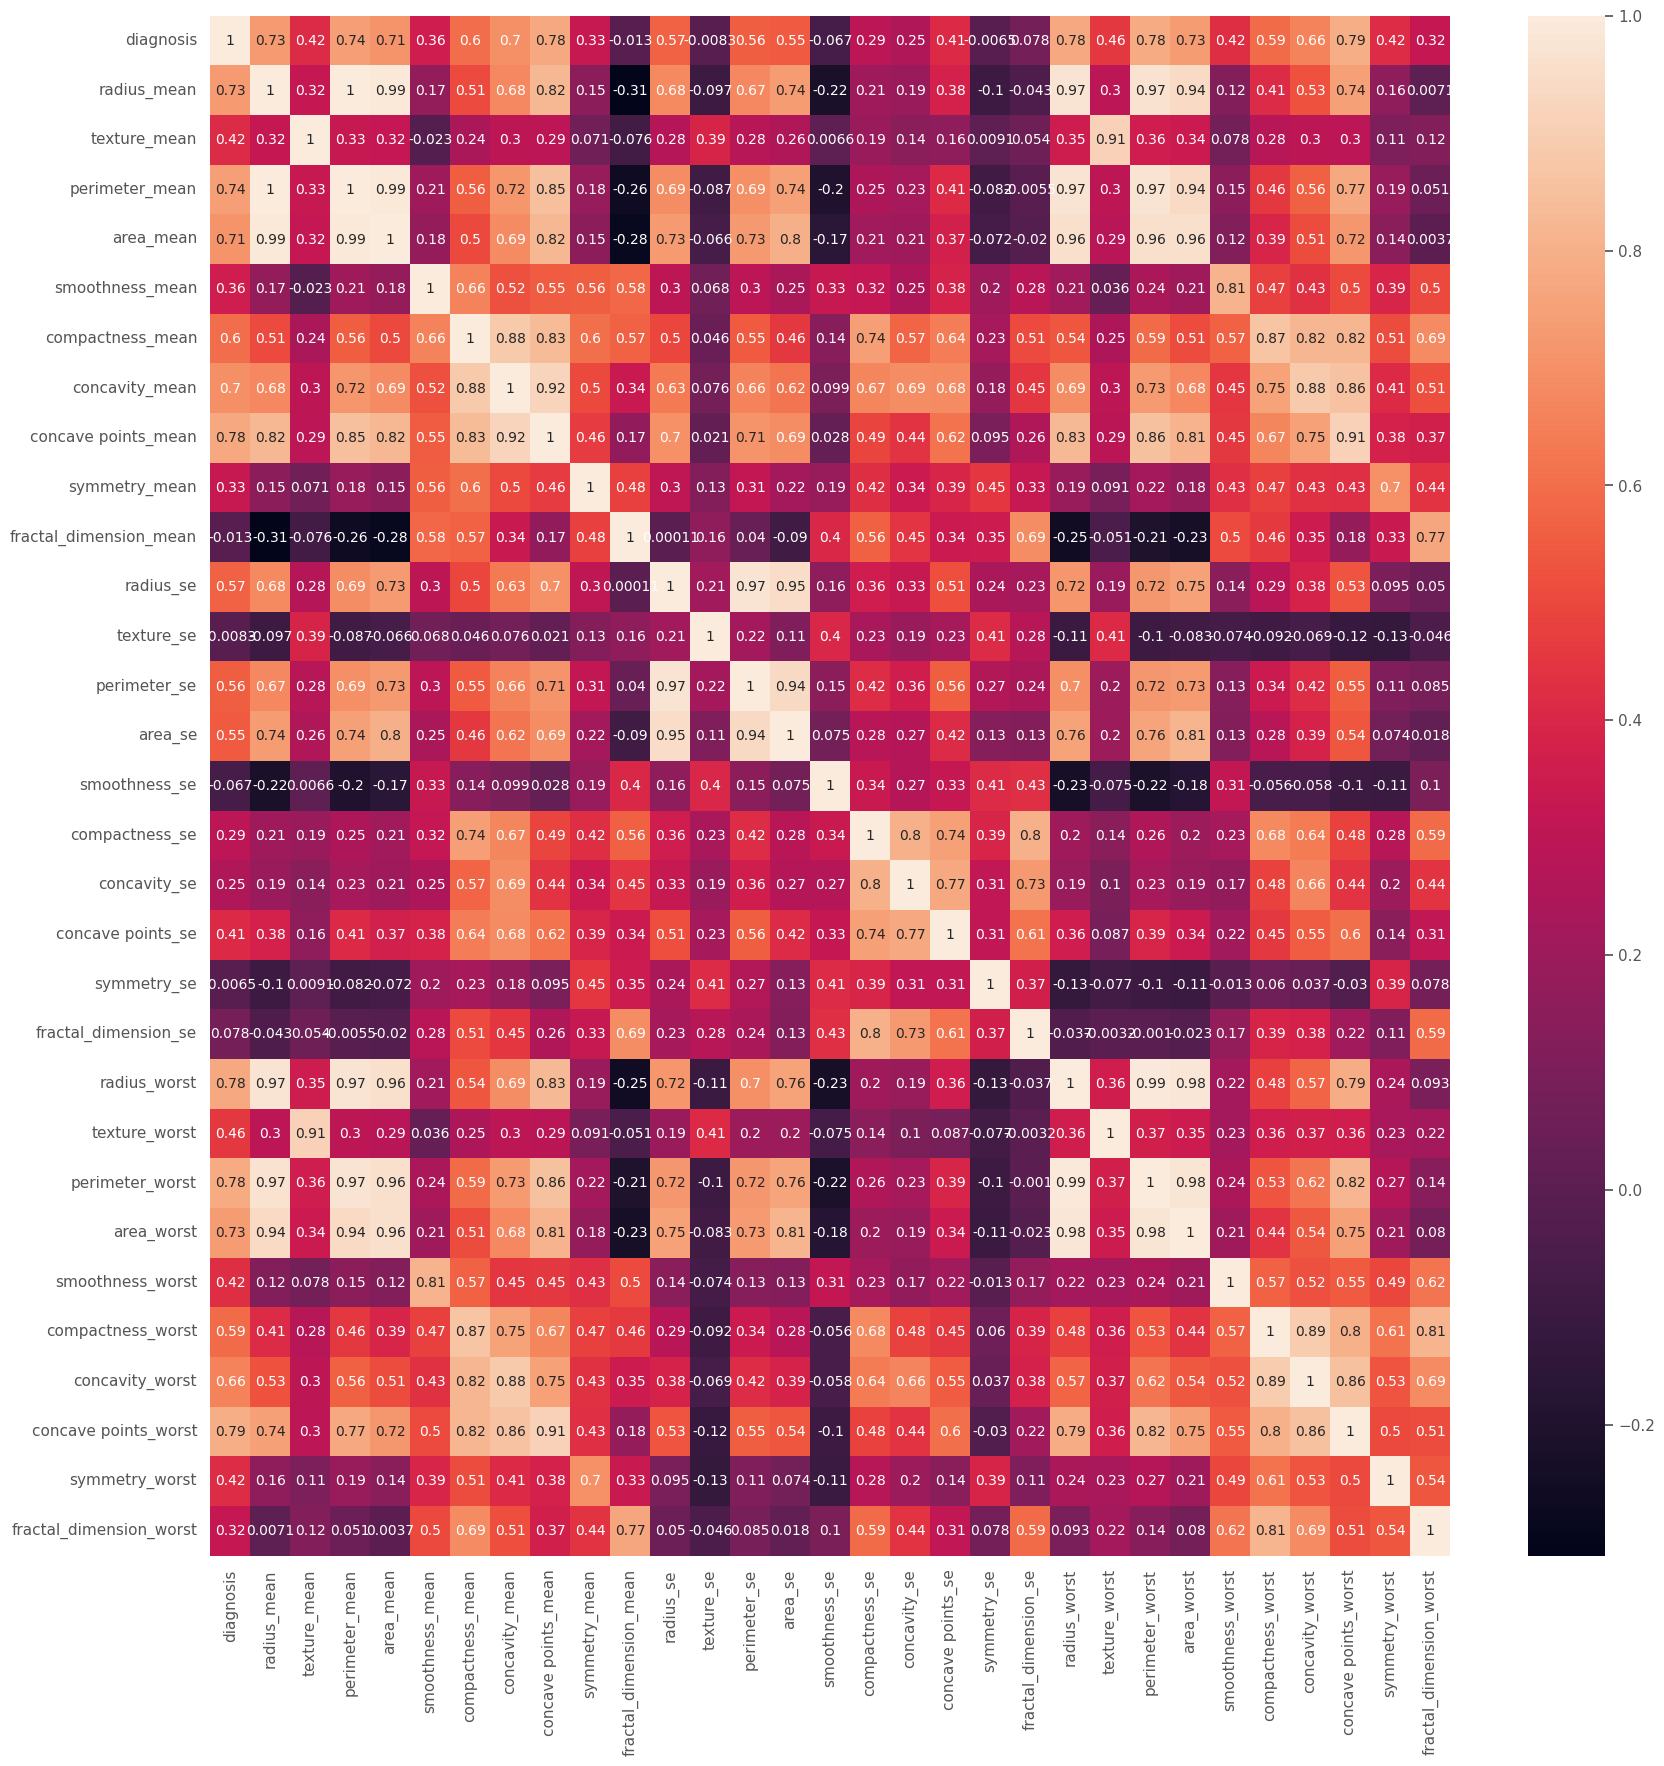

In [17]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True)
plt.show()

In [18]:
#Get Absolute Correlation with diagnosis
corr_target = abs(corr['diagnosis'])

#Select Relevant Features
relevant_features = corr_target[corr_target > 0.2]
relevant_features

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0.793566
symmetry_worst             0.416294
fractal_dimension_worst    0.323872
Name: diagnosis, dtype: float64

In [19]:
# Collect the Names of Relevant Features on LIST for training ...
names = [index for index , value in relevant_features.items()]

# Remove the Target Variable from LIST 
names.remove('diagnosis')

### *index: Represents the name of the feature (e.g., radius_mean).*
### *value: Represents the correlation value between that feature and the target variable diagnosis*

## **Define data and labels**

In [20]:
X = df[names]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
# It's important to fit the scaler only on the training data and not the test data to avoid data leakage. The test data should be treated as completely unseen data.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<div style="background-color: #3498db; color: white; text-align: center; padding: 1px; box-shadow: 0px 10px 10px rgba(0, 0, 0, 0.4);">
    <h1 style="font-weight: 900; font-size: 36px;"><i>Model Evaluation</i></h1>
</div>

### **Now let's start modeling**
### **We'll start by defining a function to help us iterate faster**

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    
    # fit the model instance
    model.fit(X_train, y_train)
    
    # Calculate predictions
    predictions = model.predict(X_test)
    
    # Compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test ,predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    
    # Create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy ,f1, precision, recall, balanced_accuracy]], columns=['Accuracy', 'F1_score', 'Precision', 'Recall', 'Balanced_accuracy'])
    return eval_df

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

## **Linear Regression**

In [23]:
LR = LogisticRegression()
results = train_evaluate_model(LR, X_train, y_train, X_test, y_test)

In [24]:
results

,Accuracy,F1_score,Precision,Recall,Balanced_accuracy
0,0.973684,0.964706,0.97619,0.953488,0.969702


In [25]:
results.index = ['LogisticRegression']
results.style.background_gradient(cmap=custom_pallete)

,Accuracy,F1_score,Precision,Recall,Balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702


## **Decision Tree**

In [26]:
DT = DecisionTreeClassifier()
results_DT = train_evaluate_model(DT, X_train, y_train, X_test, y_test)
results_DT.index = ['DecisionTree']
results = pd.concat([results, results_DT])

In [27]:
results.style.background_gradient(cmap=custom_pallete)

,Accuracy,F1_score,Precision,Recall,Balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


## **Naive Bayes**

In [28]:
NB = GaussianNB()
result_NB = train_evaluate_model(NB, X_train, y_train, X_test, y_test)
result_NB.index = ['Naive Bayes']
results = pd.concat([results, result_NB])

In [29]:
results.style.background_gradient(cmap=custom_pallete)

,Accuracy,F1_score,Precision,Recall,Balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863
Naive Bayes,0.964912,0.952381,0.975610,0.930233,0.958074


## **Random Forest**

In [30]:
RF = RandomForestClassifier()
result_RF = train_evaluate_model(RF, X_train, y_train, X_test, y_test)
result_RF.index= ['RandomForest']
results = pd.concat([results, result_RF])

In [31]:
results.style.background_gradient(cmap=custom_pallete)

,Accuracy,F1_score,Precision,Recall,Balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863
Naive Bayes,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074


## **KNearestNeighbors**

In [32]:
Knn = KNeighborsClassifier(n_neighbors=5)
result_knn = train_evaluate_model(Knn, X_train, y_train, X_test, y_test)
result_knn.index = ['KNearestNeighbors']
results = pd.concat([results , result_knn])

In [33]:
results.style.background_gradient(cmap=custom_pallete)

,Accuracy,F1_score,Precision,Recall,Balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863
Naive Bayes,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
KNearestNeighbors,0.964912,0.953488,0.953488,0.953488,0.962660


## **Support Vector Machine**

In [34]:
svc = SVC(kernel='rbf')
result_svc = train_evaluate_model(svc, X_train, y_train, X_test, y_test)
result_svc.index = ['SVM']
results = pd.concat([results, result_svc])

In [35]:
results.style.background_gradient(cmap=custom_pallete)

,Accuracy,F1_score,Precision,Recall,Balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863
Naive Bayes,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
KNearestNeighbors,0.964912,0.953488,0.953488,0.953488,0.962660
SVM,0.973684,0.964706,0.976190,0.953488,0.969702


## **XGBoost**

In [36]:
XGB = XGBClassifier()
result_XGB = train_evaluate_model(XGB, X_train, y_train, X_test, y_test)
result_XGB.index = ['XGBoost']
results = pd.concat([results, result_XGB])

In [37]:
results.style.background_gradient(cmap=custom_pallete)

,Accuracy,F1_score,Precision,Recall,Balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863
Naive Bayes,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
KNearestNeighbors,0.964912,0.953488,0.953488,0.953488,0.962660
SVM,0.973684,0.964706,0.976190,0.953488,0.969702
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032


## **Multi Layer Perceptron**

In [38]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(random_state=42)

# Train and evaluate the model
results_NN = train_evaluate_model(NN, X_train, y_train, X_test, y_test)

# Set the index to identify this model
results_NN.index = ['MultiLayerPerceptron']

# Append the results to your existing results DataFrame
results = pd.concat([results, results_NN])

In [39]:
results.style.background_gradient(cmap="Blues")

,Accuracy,F1_score,Precision,Recall,Balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863
Naive Bayes,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
KNearestNeighbors,0.964912,0.953488,0.953488,0.953488,0.962660
SVM,0.973684,0.964706,0.976190,0.953488,0.969702
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
MultiLayerPerceptron,0.982456,0.976190,1.000000,0.953488,0.976744


## **Neural Network**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Adding Layers
* The first layer has 64 neurons (nodes) and uses ReLU as the activation function. The input dimension is set to match the number of features in the training data.
* The second layer has 32 neurons, also using ReLU.
* The output layer has 1 neuron with a sigmoid activation function, suitable for binary classification.

In [41]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling the Model:

*     Optimizer: adam is a popular choice for training deep learning models because it adapts the learning rate during training.
*     Loss Function: binary_crossentropy is used for binary classification tasks, measuring the difference between predicted and actual labels.
*     Metrics: accuracy is tracked during training to monitor the proportion of correctly classified instances.

In [42]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train, epochs = 35, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/35


I0000 00:00:1724454654.298366     120 service.cc:145] XLA service 0x7b1310006af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724454654.298419     120 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724454654.298423     120 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5000 - loss: 0.6255

I0000 00:00:1724454655.447965     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6161 - loss: 0.5770 - val_accuracy: 0.9474 - val_loss: 0.3538
Epoch 2/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9411 - loss: 0.3125 - val_accuracy: 0.9649 - val_loss: 0.2052
Epoch 3/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9467 - loss: 0.1881 - val_accuracy: 0.9649 - val_loss: 0.1303
Epoch 4/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9516 - loss: 0.1534 - val_accuracy: 0.9737 - val_loss: 0.0967
Epoch 5/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9699 - loss: 0.1140 - val_accuracy: 0.9737 - val_loss: 0.0822
Epoch 6/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9708 - loss: 0.1014 - val_accuracy: 0.9737 - val_loss: 0.0748
Epoch 7/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.0828 - val_accuracy: 0.9825 - val_loss: 0.0698
Epoch 8/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9676 - loss: 0.0817 - val_accuracy: 0.9825 - val_loss: 0.0665
Ep

In [44]:
loss, accuracy = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9794 - loss: 0.1039 


In [45]:
predictions = (model.predict(X_test) > 0.5).astype("int32").flatten()
f1 = f1_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)
results_NN = pd.DataFrame([[accuracy ,f1, precision, recall, balanced_accuracy]], columns=['Accuracy', 'F1_score', 'Precision', 'Recall', 'Balanced_accuracy'])
results_NN.index = ['NeuralNetwork']

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [46]:
results = pd.concat([results, results_NN])

In [47]:
results.style.background_gradient(cmap=custom_pallete)

,Accuracy,F1_score,Precision,Recall,Balanced_accuracy
LogisticRegression,0.973684,0.964706,0.976190,0.953488,0.969702
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863
Naive Bayes,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
KNearestNeighbors,0.964912,0.953488,0.953488,0.953488,0.962660
SVM,0.973684,0.964706,0.976190,0.953488,0.969702
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
MultiLayerPerceptron,0.982456,0.976190,1.000000,0.953488,0.976744
NeuralNetwork,0.982456,0.976190,1.000000,0.953488,0.976744


<div style="background-color: #3498db; color: white; text-align: center; padding: 1px; box-shadow: 0px 10px 10px rgba(0, 0, 0, 0.4);">
    <h1 style="font-weight: 900; font-size: 36px;"><i>Evaluation</i></h1>
</div>

In [54]:
import plotly.express as px

# List of metrics you want to plot
metrics = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'Balanced_accuracy']

# Dictionary of color scales for each metric
color_scales = {
    'Accuracy': 'tealrose',
    'F1_score': 'sunset',
    'Precision': 'bluered',
    'Recall': 'viridis',
    'Balanced_accuracy': 'cividis'
}

# Loop through each metric and create a bar chart
for metric in metrics:
    fig = px.bar(
        x=results[metric].iloc[:].values,
        y=results.index[:],  # Assuming models are indexed
        orientation='h',
        color=results[metric].iloc[:],
        color_continuous_scale=color_scales[metric],
        template="seaborn"
    )
    
    fig.update_layout(
        width=800,
        height=600,
        title=f'{metric} for Different Models',
        xaxis=dict(title=metric),
        yaxis=dict(title="Models")
    )
    
    fig.show()


<div style="background-color: #3498db; color: white; text-align: center; padding: 1px; box-shadow: 0px 10px 10px rgba(0, 0, 0, 0.4);">
    <h1 style="font-weight: 900; font-size: 36px;"><i>Conclusion</i></h1>
</div>

#### Among the various models evaluated, the **Neural Networks** (both MultiLayerPerceptron and custom-built NeuralNetwork) consistently outperformed others across all metrics, making them the best choice for this classification task. They achieved the highest accuracy, F1-score, precision, and recall, demonstrating strong predictive power.
#### **SVM** and **Logistic Regression** also showed solid performance, particularly in accuracy and F1-score, making them good alternatives when simpler models are preferred.
#### **Decision Tree**, while effective in recall, had lower precision compared to others, indicating a tendency towards more false positives.